<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


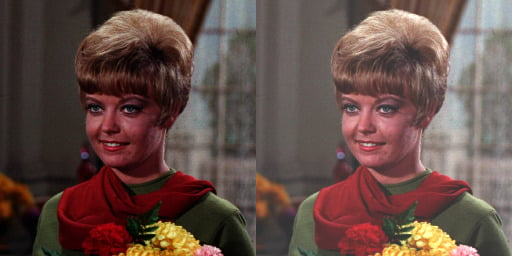

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = 255 + np.clip(original[y,x,c] + brightness, 0, 255)
# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs (original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Implementasi inverse citra
--------------------------


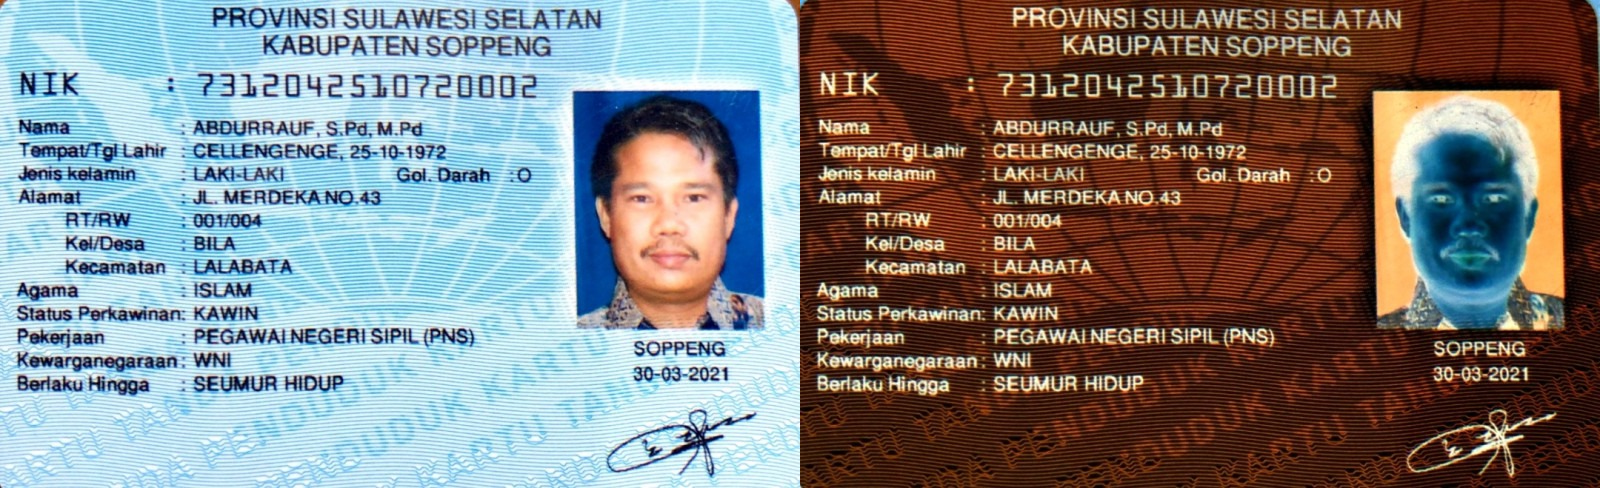

In [3]:
print('Implementasi inverse citra')
print('--------------------------')
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
#inverse image
inverse_image = 255 - original
final_frame = cv.hconcat([original, inverse_image])
cv2_imshow(final_frame)

Mengubah tingkat kecerahan dan kontras citra dengan formula faktor kontras
-------------------------------------------------------------------
Masukkan nilai kecerahan antara -255 hingga 255: 50
Masukkan nilai kontras antara 1.0 hingga 3.0: 2


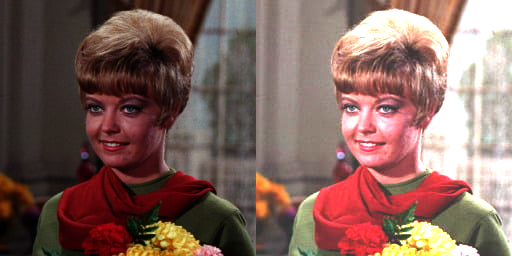

In [6]:
print('Mengubah tingkat kecerahan dan kontras citra dengan formula faktor kontras')
print('-------------------------------------------------------------------')
#Input untuk kecerahan dan kontras
try:
  brightness = int(input('Masukkan nilai kecerahan antara -255 hingga 255: '))
  contrast = int(input('Masukkan nilai kontras antara 1.0 hingga 3.0: '))
except ValueError:
  print('Error: Nilai yang dimasukkan harus berupa angka.')
#Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original [y,x,c] + brightness, 0, 255)
#Menggabungkan citra asli dan hasil untuk perbandingan
final_frame = cv.hconcat([original, brightness_image])
#Menampilkan hasil
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi log
-----------------------------------------------------
Masukkan nilai kecerahan: 50


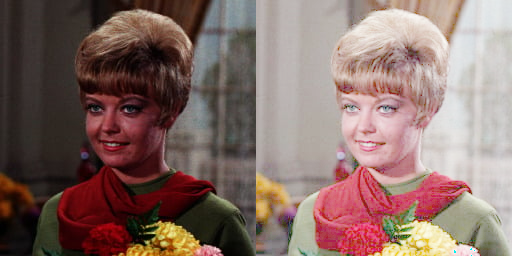

In [8]:
print('Mengubah tingkat kecerahan citra dengan Transformasi log')
print('-----------------------------------------------------')
# Input untuk kecerahan dan kontras
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error: Nilai yang dimasukkan harus berupa angka.')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

c = 255 / np.log(1 + np.max(original))
log_image = c * (np.log1p(original + 1))
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

final_frame = cv.hconcat([original, log_image])

cv2_imshow(final_frame)

Implementasikan transformasi grayscale dengan averaging
-----------------------------------------------------


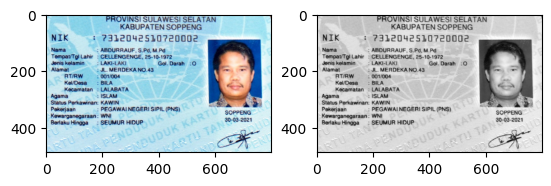

In [9]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan averaging')
print('-----------------------------------------------------')
# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
new_img = np.mean(original, axis=2).astype (np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))

plt.show()

Implementasikan transformasi grayscale dengan lightness
-----------------------------------------------------


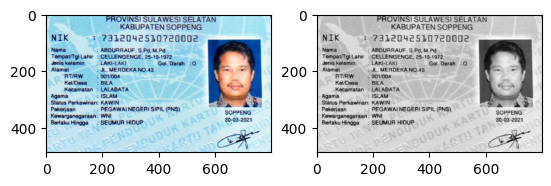

In [10]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan lightness')
print('-----------------------------------------------------')
# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')

B, G, R = cv.split(original)
max_image = np.maximum(np.maximum (R, G), B)
min_image = np.minimum(np.minimum (R, G), B)
combined = np.array([max_image, min_image])
gray_averaging = np.mean(combined, axis=0).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gray_averaging, cv.COLOR_BGR2RGB))

plt.show()

Implementasikan transformasi grayscale dengan luminance
--------------------------------------------------------


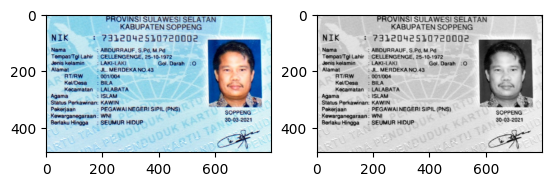

In [12]:
import matplotlib.pyplot as plt
print ('Implementasikan transformasi grayscale dengan luminance')
print ('--------------------------------------------------------')
# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
B, G, R = cv.split(original)
luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype (np.uint8)
luminance_image = np.stack([luminance] * 3, axis=-1)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(luminance_image, cv.COLOR_BGR2RGB))
plt.show()

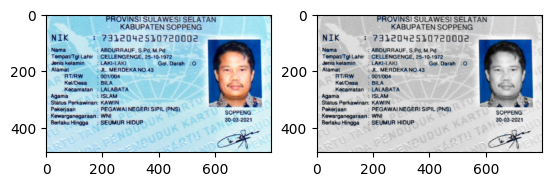

In [14]:
import matplotlib.pyplot as plt

# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_colored = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Define the color range for blue (HSV color space)
lower_blue = np.array([100, 150, 50])
upper_blue = np.array ([140, 255, 255])

# Convert the original image to HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Create a mask for the blue color
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Convert mask to 3-channel image
mask_colored = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# Combine the blue areas from the original image with the grayscale background
result = np.where (mask_colored == 0, gray_colored, original)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

plt.show()